Note: 387 missing cases have been found in the data set.

Note: 3871824 missing cases have been found in the data set.

Note: 38718241344 missing cases have been found in the data set.

Note: 387182413441404 missing cases have been found in the data set.

Note: 387182413441404900 missing cases have been found in the data set.

Note: 3871824134414049001344 missing cases have been found in the data set.

Note: 3871824134414049001344786 missing cases have been found in the data set.

Note: 38718241344140490013447861053 missing cases have been found in the data set.

Note: 387182413441404900134478610531005 missing cases have been found in the data set.

All missings have been removed.



# A tibble: 3 × 10
  Algorithm  aorta gall_bladder kidney_left kidney_right liver pancreas postcava
  <chr>      <chr> <chr>        <chr>       <chr>        <chr> <chr>    <chr>   
1 MONAI_LHU… 63.0… 71.3 ± 32.2  82.4 ± 27.0 81.8 ± 29.3  87.7… 68.6 ± … 67.5 ± …
2 MONAI_Seg… 60.8… 68.1 ± 29.3  82.6 ± 24.8 82.8 ± 23.5  89.4… 66.3 ± … 63.0 ± …
3 MONAI_Swi… 54.5… 50.6 ± 40.6  58.5 ± 40.2 59.7 ± 39.4  80.2… 42.3 ± … 38.1 ± …
# ℹ 2 more variables: spleen <chr>, stomach <chr>


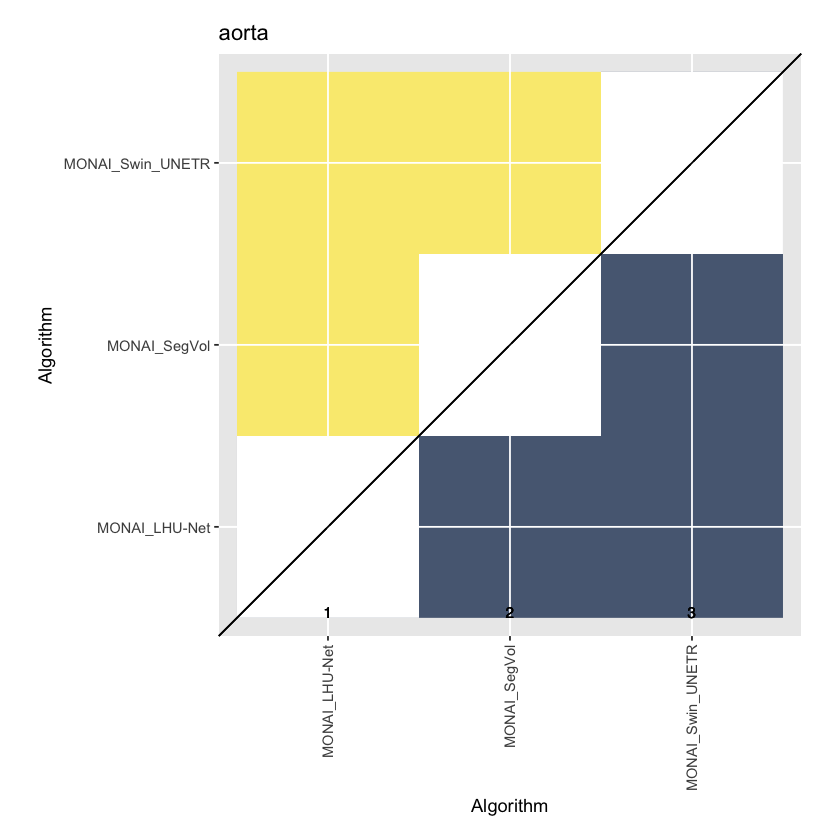

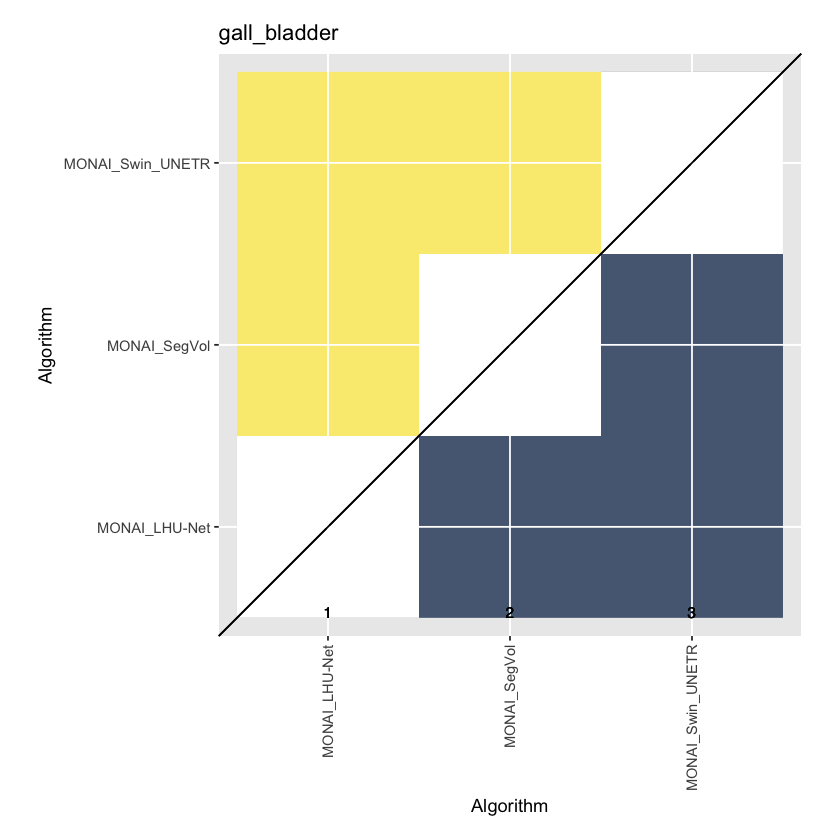

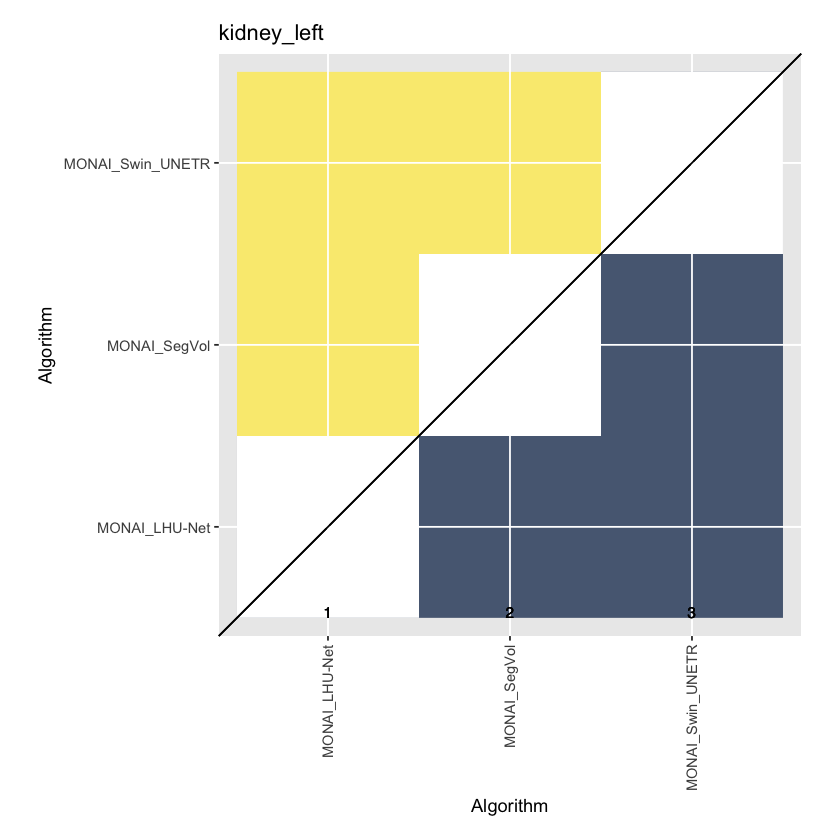

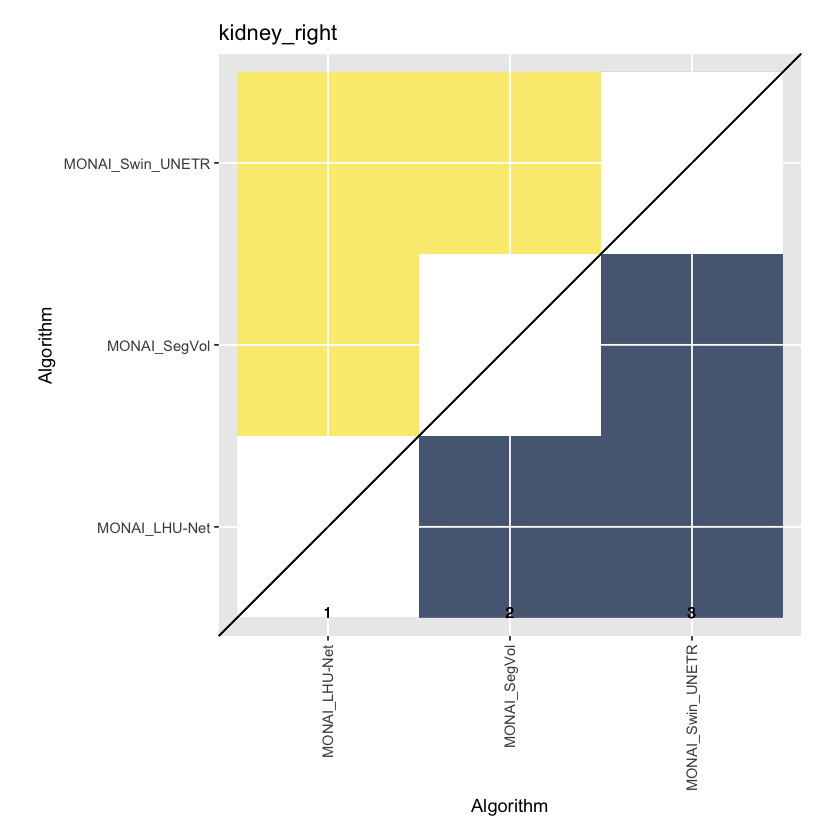

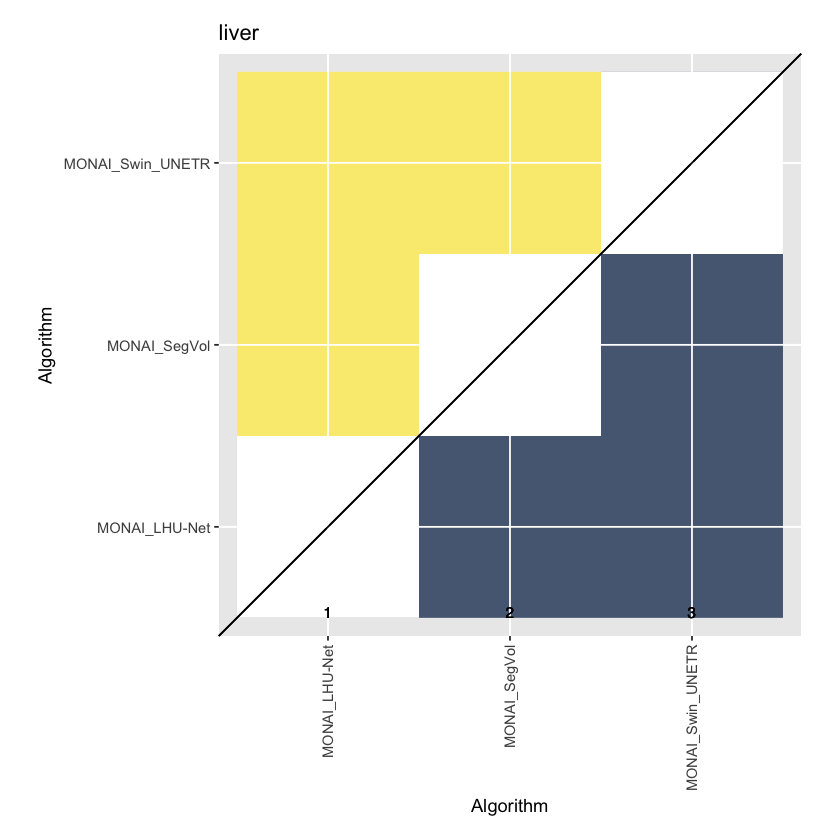

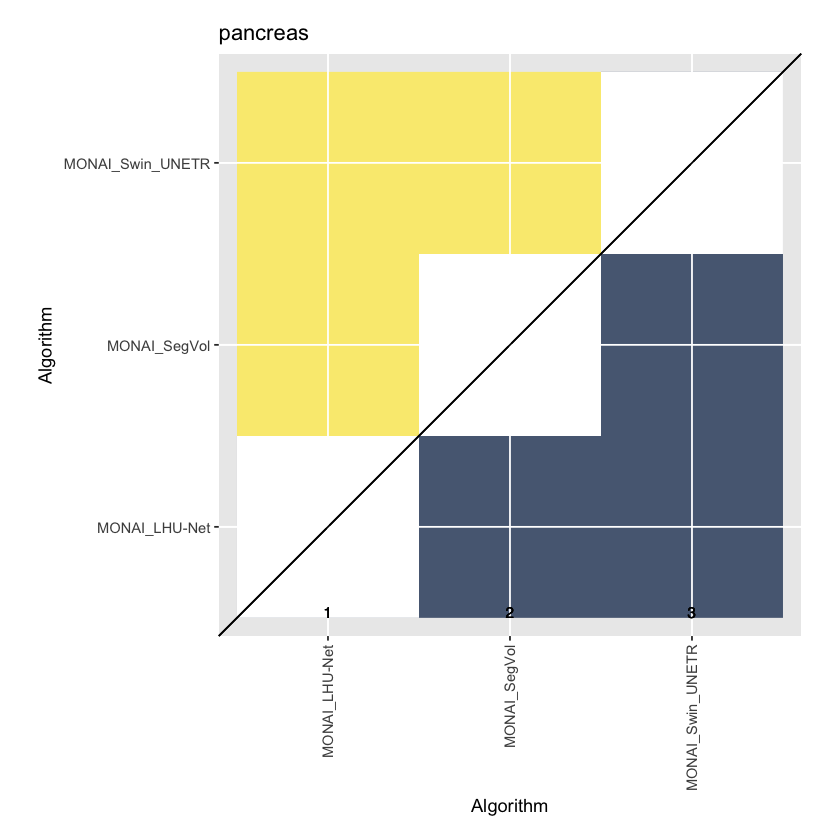

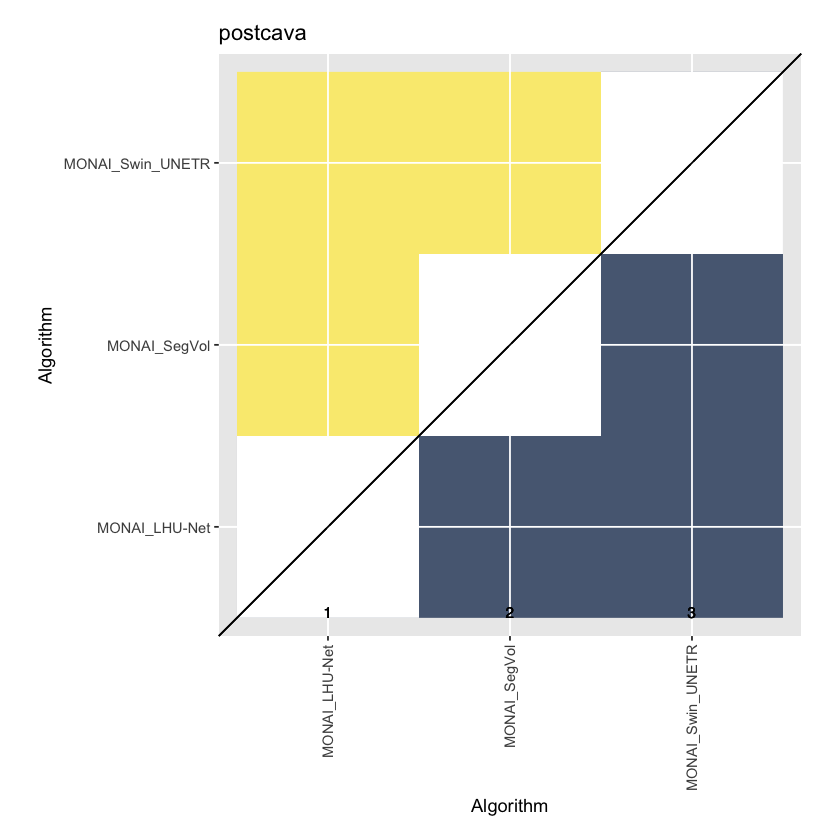

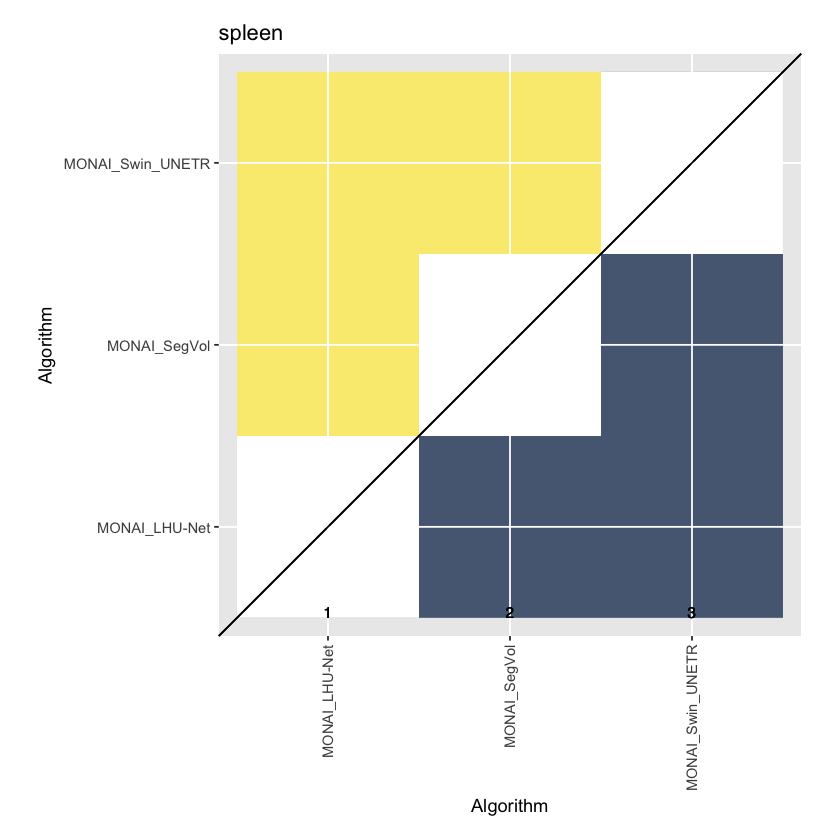

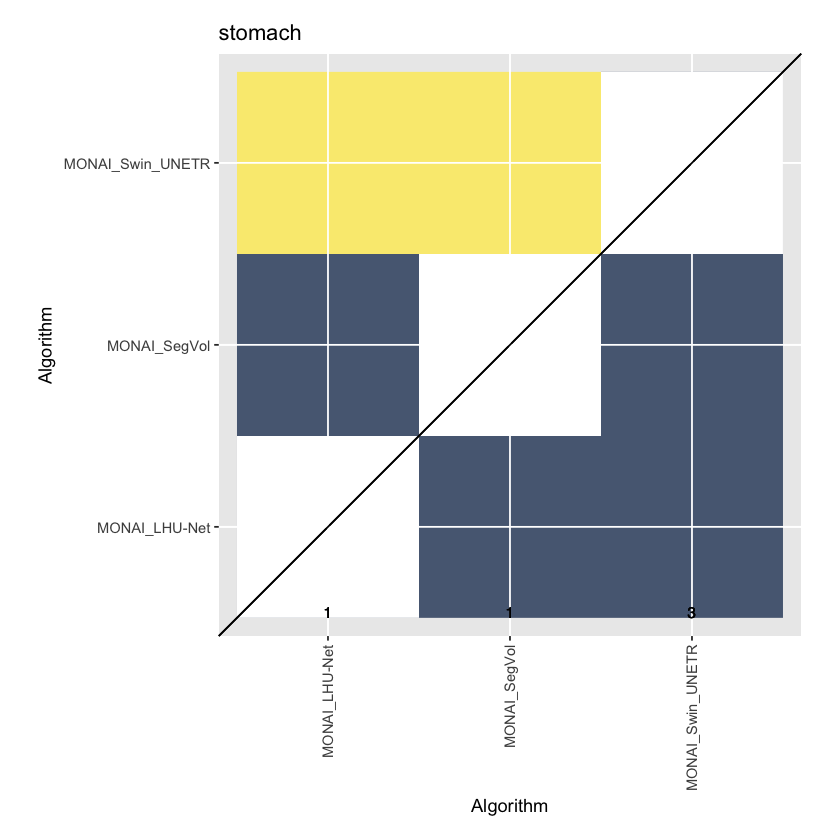

In [3]:
########################################
## 1) Load libraries
########################################
library(dplyr)
library(tidyr)
library(challengeR)

########################################
## 2) Suppose you have a vector of model names and file paths
########################################
model_info <- data.frame(
  model_name = c("MONAI_LHU-Net", "MONAI_SegVol", "MONAI_Swin_UNETR"),
  file_path  = c("totalsegmentator_results/MONAI_LHU-Net/dsc.csv",
                 "totalsegmentator_results/MONAI_SegVol/dsc.csv",
                 "totalsegmentator_results/MONAI_Swin_UNETR/dsc.csv"),
  stringsAsFactors = FALSE
)

########################################
## 3) Read each model's DSC.csv, reshape to long form, and combine
########################################
all_data_long <- data.frame()  # empty to start

for (i in seq_len(nrow(model_info))) {
  this_model <- model_info$model_name[i]
  this_file  <- model_info$file_path[i]

  # Read the CSV. Each row = one Case "name", columns are organs
  # Some entries are blank => become NA
  df_wide <- read.csv(this_file, stringsAsFactors = FALSE)

  # Pivot longer: now we have columns: name, organ, dsc
  df_long <- df_wide %>%
    pivot_longer(
      cols = -name,
      names_to = "organ",
      values_to = "dsc"
    )

  # Tag the algorithm name:
  df_long$Algorithm <- this_model

  # Append to the master data.frame:
  all_data_long <- bind_rows(all_data_long, df_long)
}

########################################
## 4) Turn that into a challenge object
########################################
my_challenge <- as.challenge(
  object      = all_data_long,
  case        = "name",
  algorithm   = "Algorithm",
  value       = "dsc",
  by          = "organ",    # each organ is treated as a "task"
  smallBetter = FALSE,      # higher DSC is better
  na.treat    = "na.rm",    # remove rows with NA automatically
  check       = TRUE        # perform sanity checks
)

########################################
## 5) For each organ (task), compute mean and std for each algorithm
########################################
# IMPORTANT: Pass the aggregation function as a character!
mean_obj <- aggregate(my_challenge, FUN = "mean", na.treat = "na.rm")
sd_obj   <- aggregate(my_challenge, FUN = "sd",   na.treat = "na.rm")

########################################
## 6) Combine them into a single table “mean ± sd”
########################################
all_organs <- names(mean_obj$matlist)  # e.g. "aorta", "gall_bladder", etc.

res_table <- data.frame()

for (org in all_organs) {
  df_mean <- mean_obj$matlist[[org]]
  df_sd   <- sd_obj$matlist[[org]]

  # Determine the column names produced by aggregate.
  col_mean <- colnames(df_mean)[ncol(df_mean)]
  col_sd   <- colnames(df_sd)[ncol(df_sd)]

  tmp <- data.frame(
    Algorithm = rownames(df_mean),
    organ     = org,
    DSC_mean  = df_mean[[ col_mean ]],
    DSC_sd    = df_sd[[ col_sd ]]
  )
  tmp$DSC_string <- sprintf("%.1f ± %.1f", 100 * tmp$DSC_mean, 100 * tmp$DSC_sd)

  res_table <- rbind(res_table, tmp)
}

library(tidyr)
final_table <- res_table %>%
  select(Algorithm, organ, DSC_string) %>%
  pivot_wider(
    names_from  = organ,
    values_from = DSC_string
  ) %>%
  arrange(Algorithm)

########################################
## 7) Inspect final_table
########################################
print(final_table)

########################################
## 8) (Optional) Significance testing and map
########################################
sig_obj <- aggregate(my_challenge, FUN = "significance", alpha = 0.05,
                     p.adjust.method = "holm")
my_ranked <- rank(sig_obj)
significanceMap(my_ranked)


Processing organ: aorta

Note: 2449 missing cases have been found in the data set.

Performance of not all algorithms has been observed for all cases.
Therefore, missings have been inserted in the following cases:



                 algo  case
1   nnU-Net_STU-Net_H s0001
2   nnU-Net_STU-Net_H s0048
3   nnU-Net_STU-Net_H s0061
4   nnU-Net_STU-Net_H s0062
5   nnU-Net_STU-Net_H s0066
6   nnU-Net_STU-Net_H s0067
7   nnU-Net_STU-Net_H s0079
8   nnU-Net_STU-Net_H s0112
9   nnU-Net_STU-Net_H s0114
10  nnU-Net_STU-Net_H s0117
11  nnU-Net_STU-Net_H s0130
12  nnU-Net_STU-Net_H s0146
13  nnU-Net_STU-Net_H s0154
14  nnU-Net_STU-Net_H s0169
15  nnU-Net_STU-Net_H s0209
16  nnU-Net_STU-Net_H s0226
17  nnU-Net_STU-Net_H s0235
18  nnU-Net_STU-Net_H s0242
19  nnU-Net_STU-Net_H s0254
20  nnU-Net_STU-Net_H s0301
21  nnU-Net_STU-Net_H s0311
22  nnU-Net_STU-Net_H s0326
23  nnU-Net_STU-Net_H s0353
24  nnU-Net_STU-Net_H s0361
25  nnU-Net_STU-Net_H s0386
26  nnU-Net_STU-Net_H s0436
27  nnU-Net_STU-Net_H s0457
28  nnU-Net_STU-Net_H s0504
29  nnU-Net_STU-Net_H s0526
30  nnU-Net_STU-Net_H s0527
31  nnU-Net_STU-Net_H s0552
32  nnU-Net_STU-Net_H s0557
33  nnU-Net_STU-Net_H s0559
34  nnU-Net_STU-Net_H s0561
35  nnU-Net_STU-Net_

All missings have been removed.

Processing organ: gall_bladder

Note: 11416 missing cases have been found in the data set.

Performance of not all algorithms has been observed for all cases.
Therefore, missings have been inserted in the following cases:



                 algo  case
1   nnU-Net_STU-Net_H s0001
2   nnU-Net_STU-Net_H s0048
3   nnU-Net_STU-Net_H s0061
4   nnU-Net_STU-Net_H s0062
5   nnU-Net_STU-Net_H s0066
6   nnU-Net_STU-Net_H s0067
7   nnU-Net_STU-Net_H s0079
8   nnU-Net_STU-Net_H s0112
9   nnU-Net_STU-Net_H s0114
10  nnU-Net_STU-Net_H s0117
11  nnU-Net_STU-Net_H s0130
12  nnU-Net_STU-Net_H s0146
13  nnU-Net_STU-Net_H s0154
14  nnU-Net_STU-Net_H s0169
15  nnU-Net_STU-Net_H s0209
16  nnU-Net_STU-Net_H s0226
17  nnU-Net_STU-Net_H s0235
18  nnU-Net_STU-Net_H s0242
19  nnU-Net_STU-Net_H s0254
20  nnU-Net_STU-Net_H s0301
21  nnU-Net_STU-Net_H s0311
22  nnU-Net_STU-Net_H s0326
23  nnU-Net_STU-Net_H s0353
24  nnU-Net_STU-Net_H s0361
25  nnU-Net_STU-Net_H s0386
26  nnU-Net_STU-Net_H s0436
27  nnU-Net_STU-Net_H s0457
28  nnU-Net_STU-Net_H s0504
29  nnU-Net_STU-Net_H s0526
30  nnU-Net_STU-Net_H s0527
31  nnU-Net_STU-Net_H s0552
32  nnU-Net_STU-Net_H s0557
33  nnU-Net_STU-Net_H s0559
34  nnU-Net_STU-Net_H s0561
35  nnU-Net_STU-Net_

All missings have been removed.

Processing organ: kidney_left

Note: 8414 missing cases have been found in the data set.

Performance of not all algorithms has been observed for all cases.
Therefore, missings have been inserted in the following cases:



                 algo  case
1   nnU-Net_STU-Net_H s0001
2   nnU-Net_STU-Net_H s0048
3   nnU-Net_STU-Net_H s0061
4   nnU-Net_STU-Net_H s0062
5   nnU-Net_STU-Net_H s0066
6   nnU-Net_STU-Net_H s0067
7   nnU-Net_STU-Net_H s0079
8   nnU-Net_STU-Net_H s0112
9   nnU-Net_STU-Net_H s0114
10  nnU-Net_STU-Net_H s0117
11  nnU-Net_STU-Net_H s0130
12  nnU-Net_STU-Net_H s0146
13  nnU-Net_STU-Net_H s0154
14  nnU-Net_STU-Net_H s0169
15  nnU-Net_STU-Net_H s0209
16  nnU-Net_STU-Net_H s0226
17  nnU-Net_STU-Net_H s0235
18  nnU-Net_STU-Net_H s0242
19  nnU-Net_STU-Net_H s0254
20  nnU-Net_STU-Net_H s0301
21  nnU-Net_STU-Net_H s0311
22  nnU-Net_STU-Net_H s0326
23  nnU-Net_STU-Net_H s0353
24  nnU-Net_STU-Net_H s0361
25  nnU-Net_STU-Net_H s0386
26  nnU-Net_STU-Net_H s0436
27  nnU-Net_STU-Net_H s0457
28  nnU-Net_STU-Net_H s0504
29  nnU-Net_STU-Net_H s0526
30  nnU-Net_STU-Net_H s0527
31  nnU-Net_STU-Net_H s0552
32  nnU-Net_STU-Net_H s0557
33  nnU-Net_STU-Net_H s0559
34  nnU-Net_STU-Net_H s0561
35  nnU-Net_STU-Net_

All missings have been removed.

Processing organ: kidney_right

Note: 8792 missing cases have been found in the data set.

Performance of not all algorithms has been observed for all cases.
Therefore, missings have been inserted in the following cases:



                 algo  case
1   nnU-Net_STU-Net_H s0001
2   nnU-Net_STU-Net_H s0048
3   nnU-Net_STU-Net_H s0061
4   nnU-Net_STU-Net_H s0062
5   nnU-Net_STU-Net_H s0066
6   nnU-Net_STU-Net_H s0067
7   nnU-Net_STU-Net_H s0079
8   nnU-Net_STU-Net_H s0112
9   nnU-Net_STU-Net_H s0114
10  nnU-Net_STU-Net_H s0117
11  nnU-Net_STU-Net_H s0130
12  nnU-Net_STU-Net_H s0146
13  nnU-Net_STU-Net_H s0154
14  nnU-Net_STU-Net_H s0169
15  nnU-Net_STU-Net_H s0209
16  nnU-Net_STU-Net_H s0226
17  nnU-Net_STU-Net_H s0235
18  nnU-Net_STU-Net_H s0242
19  nnU-Net_STU-Net_H s0254
20  nnU-Net_STU-Net_H s0301
21  nnU-Net_STU-Net_H s0311
22  nnU-Net_STU-Net_H s0326
23  nnU-Net_STU-Net_H s0353
24  nnU-Net_STU-Net_H s0361
25  nnU-Net_STU-Net_H s0386
26  nnU-Net_STU-Net_H s0436
27  nnU-Net_STU-Net_H s0457
28  nnU-Net_STU-Net_H s0504
29  nnU-Net_STU-Net_H s0526
30  nnU-Net_STU-Net_H s0527
31  nnU-Net_STU-Net_H s0552
32  nnU-Net_STU-Net_H s0557
33  nnU-Net_STU-Net_H s0559
34  nnU-Net_STU-Net_H s0561
35  nnU-Net_STU-Net_

All missings have been removed.

Processing organ: liver

Note: 5624 missing cases have been found in the data set.

Performance of not all algorithms has been observed for all cases.
Therefore, missings have been inserted in the following cases:



                 algo  case
1   nnU-Net_STU-Net_H s0001
2   nnU-Net_STU-Net_H s0048
3   nnU-Net_STU-Net_H s0061
4   nnU-Net_STU-Net_H s0062
5   nnU-Net_STU-Net_H s0066
6   nnU-Net_STU-Net_H s0067
7   nnU-Net_STU-Net_H s0079
8   nnU-Net_STU-Net_H s0112
9   nnU-Net_STU-Net_H s0114
10  nnU-Net_STU-Net_H s0117
11  nnU-Net_STU-Net_H s0130
12  nnU-Net_STU-Net_H s0146
13  nnU-Net_STU-Net_H s0154
14  nnU-Net_STU-Net_H s0169
15  nnU-Net_STU-Net_H s0209
16  nnU-Net_STU-Net_H s0226
17  nnU-Net_STU-Net_H s0235
18  nnU-Net_STU-Net_H s0242
19  nnU-Net_STU-Net_H s0254
20  nnU-Net_STU-Net_H s0301
21  nnU-Net_STU-Net_H s0311
22  nnU-Net_STU-Net_H s0326
23  nnU-Net_STU-Net_H s0353
24  nnU-Net_STU-Net_H s0361
25  nnU-Net_STU-Net_H s0386
26  nnU-Net_STU-Net_H s0436
27  nnU-Net_STU-Net_H s0457
28  nnU-Net_STU-Net_H s0504
29  nnU-Net_STU-Net_H s0526
30  nnU-Net_STU-Net_H s0527
31  nnU-Net_STU-Net_H s0552
32  nnU-Net_STU-Net_H s0557
33  nnU-Net_STU-Net_H s0559
34  nnU-Net_STU-Net_H s0561
35  nnU-Net_STU-Net_

All missings have been removed.

Processing organ: pancreas

Note: 8414 missing cases have been found in the data set.

Performance of not all algorithms has been observed for all cases.
Therefore, missings have been inserted in the following cases:



                 algo  case
1   nnU-Net_STU-Net_H s0001
2   nnU-Net_STU-Net_H s0048
3   nnU-Net_STU-Net_H s0061
4   nnU-Net_STU-Net_H s0062
5   nnU-Net_STU-Net_H s0066
6   nnU-Net_STU-Net_H s0067
7   nnU-Net_STU-Net_H s0079
8   nnU-Net_STU-Net_H s0112
9   nnU-Net_STU-Net_H s0114
10  nnU-Net_STU-Net_H s0117
11  nnU-Net_STU-Net_H s0130
12  nnU-Net_STU-Net_H s0146
13  nnU-Net_STU-Net_H s0154
14  nnU-Net_STU-Net_H s0169
15  nnU-Net_STU-Net_H s0209
16  nnU-Net_STU-Net_H s0226
17  nnU-Net_STU-Net_H s0235
18  nnU-Net_STU-Net_H s0242
19  nnU-Net_STU-Net_H s0254
20  nnU-Net_STU-Net_H s0301
21  nnU-Net_STU-Net_H s0311
22  nnU-Net_STU-Net_H s0326
23  nnU-Net_STU-Net_H s0353
24  nnU-Net_STU-Net_H s0361
25  nnU-Net_STU-Net_H s0386
26  nnU-Net_STU-Net_H s0436
27  nnU-Net_STU-Net_H s0457
28  nnU-Net_STU-Net_H s0504
29  nnU-Net_STU-Net_H s0526
30  nnU-Net_STU-Net_H s0527
31  nnU-Net_STU-Net_H s0552
32  nnU-Net_STU-Net_H s0557
33  nnU-Net_STU-Net_H s0559
34  nnU-Net_STU-Net_H s0561
35  nnU-Net_STU-Net_

All missings have been removed.

Processing organ: postcava

Note: 4922 missing cases have been found in the data set.

Performance of not all algorithms has been observed for all cases.
Therefore, missings have been inserted in the following cases:



                 algo  case
1   nnU-Net_STU-Net_H s0001
2   nnU-Net_STU-Net_H s0048
3   nnU-Net_STU-Net_H s0061
4   nnU-Net_STU-Net_H s0062
5   nnU-Net_STU-Net_H s0066
6   nnU-Net_STU-Net_H s0067
7   nnU-Net_STU-Net_H s0079
8   nnU-Net_STU-Net_H s0112
9   nnU-Net_STU-Net_H s0114
10  nnU-Net_STU-Net_H s0117
11  nnU-Net_STU-Net_H s0130
12  nnU-Net_STU-Net_H s0146
13  nnU-Net_STU-Net_H s0154
14  nnU-Net_STU-Net_H s0169
15  nnU-Net_STU-Net_H s0209
16  nnU-Net_STU-Net_H s0226
17  nnU-Net_STU-Net_H s0235
18  nnU-Net_STU-Net_H s0242
19  nnU-Net_STU-Net_H s0254
20  nnU-Net_STU-Net_H s0301
21  nnU-Net_STU-Net_H s0311
22  nnU-Net_STU-Net_H s0326
23  nnU-Net_STU-Net_H s0353
24  nnU-Net_STU-Net_H s0361
25  nnU-Net_STU-Net_H s0386
26  nnU-Net_STU-Net_H s0436
27  nnU-Net_STU-Net_H s0457
28  nnU-Net_STU-Net_H s0504
29  nnU-Net_STU-Net_H s0526
30  nnU-Net_STU-Net_H s0527
31  nnU-Net_STU-Net_H s0552
32  nnU-Net_STU-Net_H s0557
33  nnU-Net_STU-Net_H s0559
34  nnU-Net_STU-Net_H s0561
35  nnU-Net_STU-Net_

All missings have been removed.

Processing organ: spleen

Note: 6577 missing cases have been found in the data set.

Performance of not all algorithms has been observed for all cases.
Therefore, missings have been inserted in the following cases:



                 algo  case
1   nnU-Net_STU-Net_H s0001
2   nnU-Net_STU-Net_H s0048
3   nnU-Net_STU-Net_H s0061
4   nnU-Net_STU-Net_H s0062
5   nnU-Net_STU-Net_H s0066
6   nnU-Net_STU-Net_H s0067
7   nnU-Net_STU-Net_H s0079
8   nnU-Net_STU-Net_H s0112
9   nnU-Net_STU-Net_H s0114
10  nnU-Net_STU-Net_H s0117
11  nnU-Net_STU-Net_H s0130
12  nnU-Net_STU-Net_H s0146
13  nnU-Net_STU-Net_H s0154
14  nnU-Net_STU-Net_H s0169
15  nnU-Net_STU-Net_H s0209
16  nnU-Net_STU-Net_H s0226
17  nnU-Net_STU-Net_H s0235
18  nnU-Net_STU-Net_H s0242
19  nnU-Net_STU-Net_H s0254
20  nnU-Net_STU-Net_H s0301
21  nnU-Net_STU-Net_H s0311
22  nnU-Net_STU-Net_H s0326
23  nnU-Net_STU-Net_H s0353
24  nnU-Net_STU-Net_H s0361
25  nnU-Net_STU-Net_H s0386
26  nnU-Net_STU-Net_H s0436
27  nnU-Net_STU-Net_H s0457
28  nnU-Net_STU-Net_H s0504
29  nnU-Net_STU-Net_H s0526
30  nnU-Net_STU-Net_H s0527
31  nnU-Net_STU-Net_H s0552
32  nnU-Net_STU-Net_H s0557
33  nnU-Net_STU-Net_H s0559
34  nnU-Net_STU-Net_H s0561
35  nnU-Net_STU-Net_

All missings have been removed.

Processing organ: stomach

Note: 6279 missing cases have been found in the data set.

Performance of not all algorithms has been observed for all cases.
Therefore, missings have been inserted in the following cases:



                 algo  case
1   nnU-Net_STU-Net_H s0001
2   nnU-Net_STU-Net_H s0048
3   nnU-Net_STU-Net_H s0061
4   nnU-Net_STU-Net_H s0062
5   nnU-Net_STU-Net_H s0066
6   nnU-Net_STU-Net_H s0067
7   nnU-Net_STU-Net_H s0079
8   nnU-Net_STU-Net_H s0112
9   nnU-Net_STU-Net_H s0114
10  nnU-Net_STU-Net_H s0117
11  nnU-Net_STU-Net_H s0130
12  nnU-Net_STU-Net_H s0146
13  nnU-Net_STU-Net_H s0154
14  nnU-Net_STU-Net_H s0169
15  nnU-Net_STU-Net_H s0209
16  nnU-Net_STU-Net_H s0226
17  nnU-Net_STU-Net_H s0235
18  nnU-Net_STU-Net_H s0242
19  nnU-Net_STU-Net_H s0254
20  nnU-Net_STU-Net_H s0301
21  nnU-Net_STU-Net_H s0311
22  nnU-Net_STU-Net_H s0326
23  nnU-Net_STU-Net_H s0353
24  nnU-Net_STU-Net_H s0361
25  nnU-Net_STU-Net_H s0386
26  nnU-Net_STU-Net_H s0436
27  nnU-Net_STU-Net_H s0457
28  nnU-Net_STU-Net_H s0504
29  nnU-Net_STU-Net_H s0526
30  nnU-Net_STU-Net_H s0527
31  nnU-Net_STU-Net_H s0552
32  nnU-Net_STU-Net_H s0557
33  nnU-Net_STU-Net_H s0559
34  nnU-Net_STU-Net_H s0561
35  nnU-Net_STU-Net_

All missings have been removed.



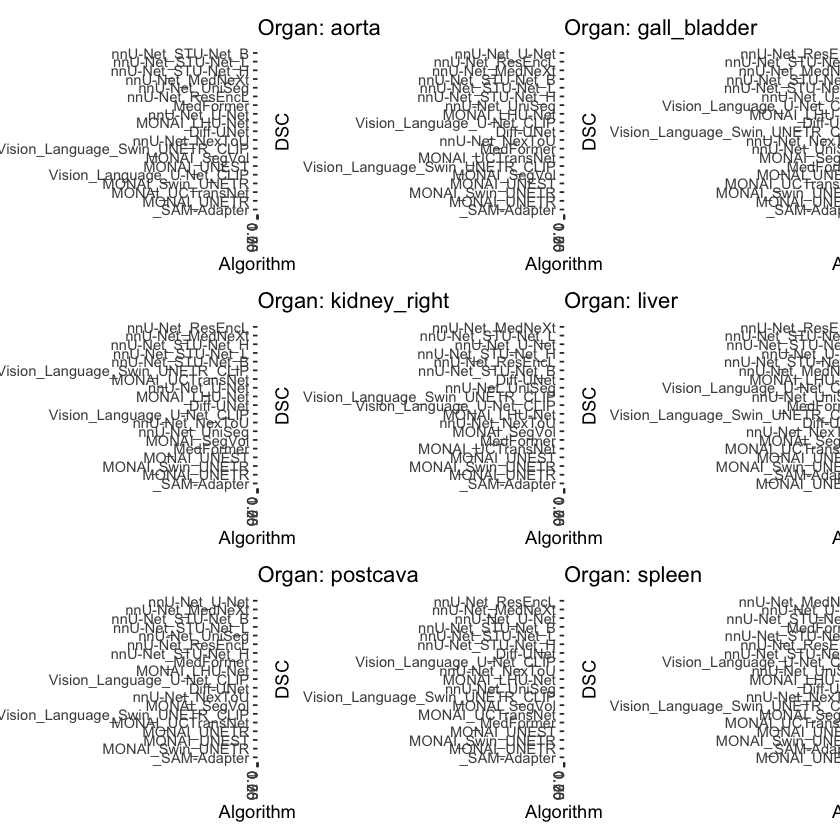

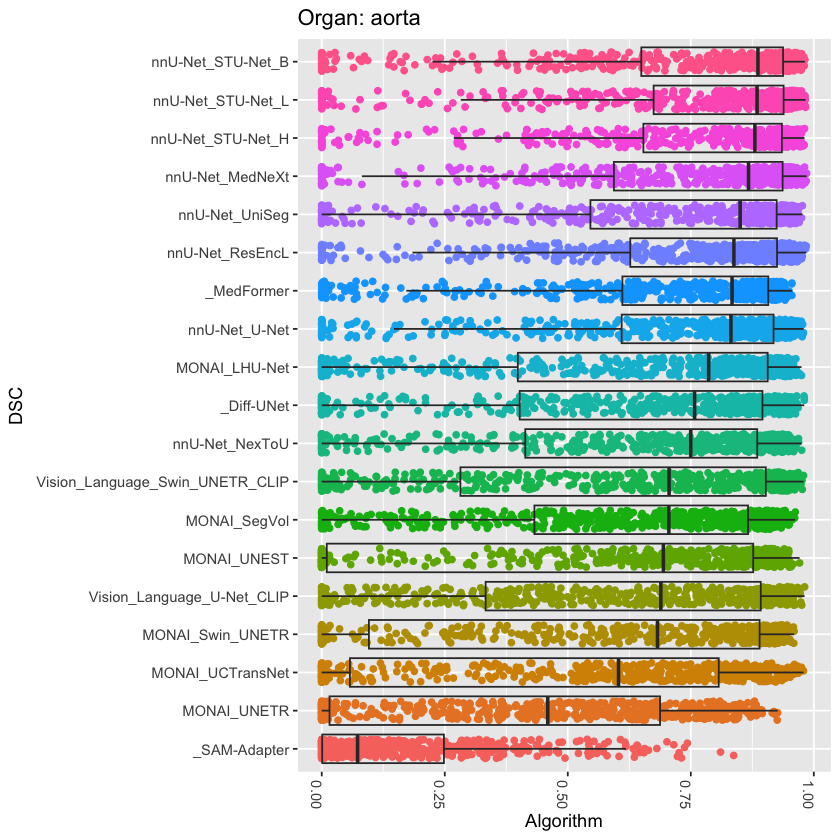

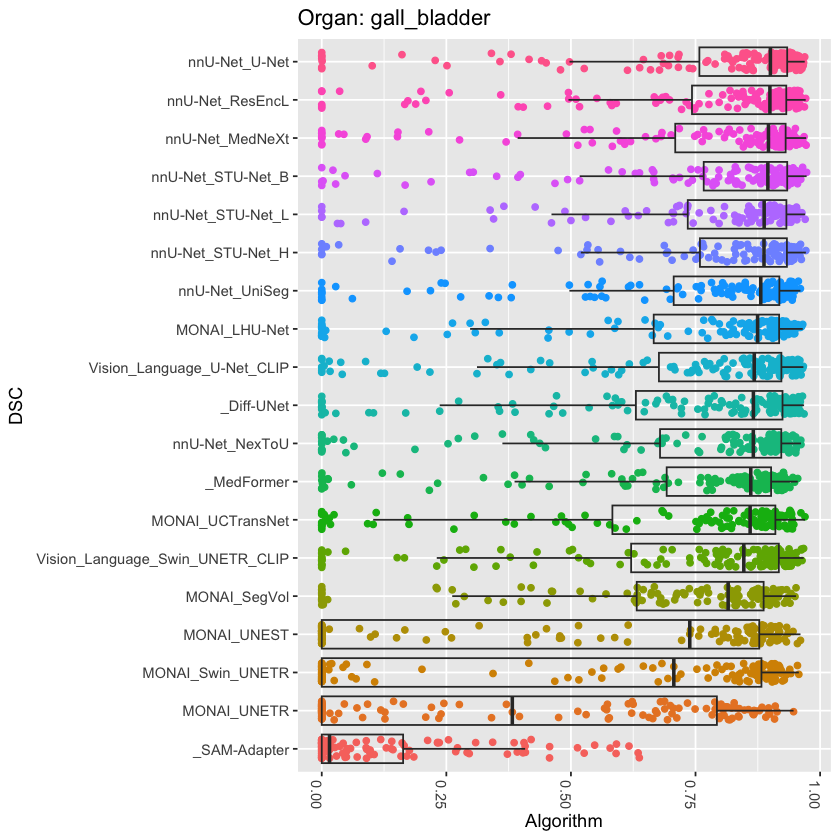

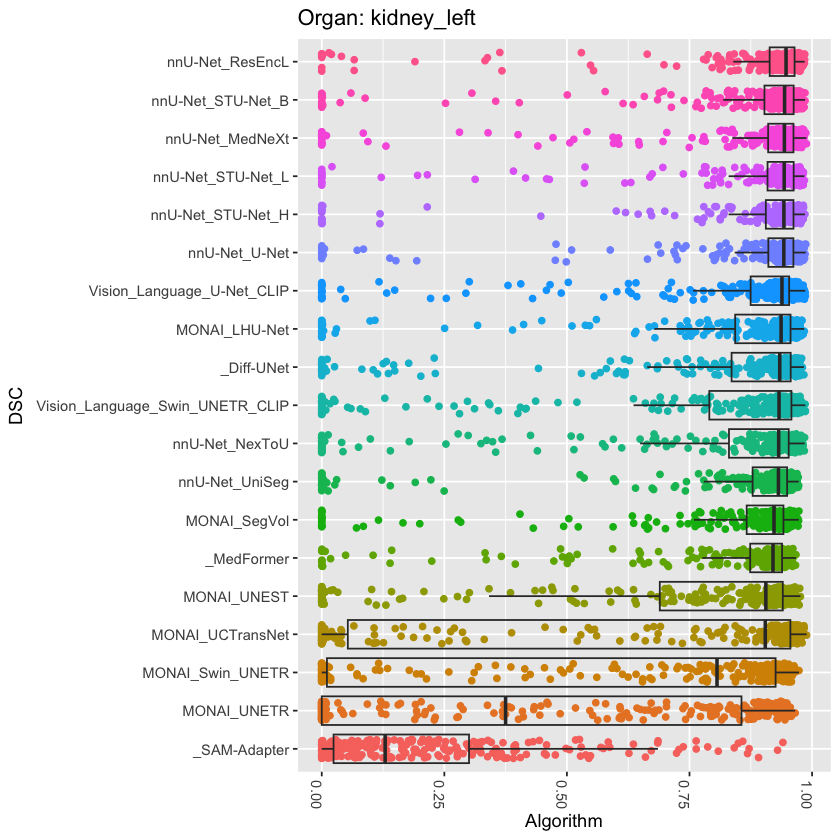

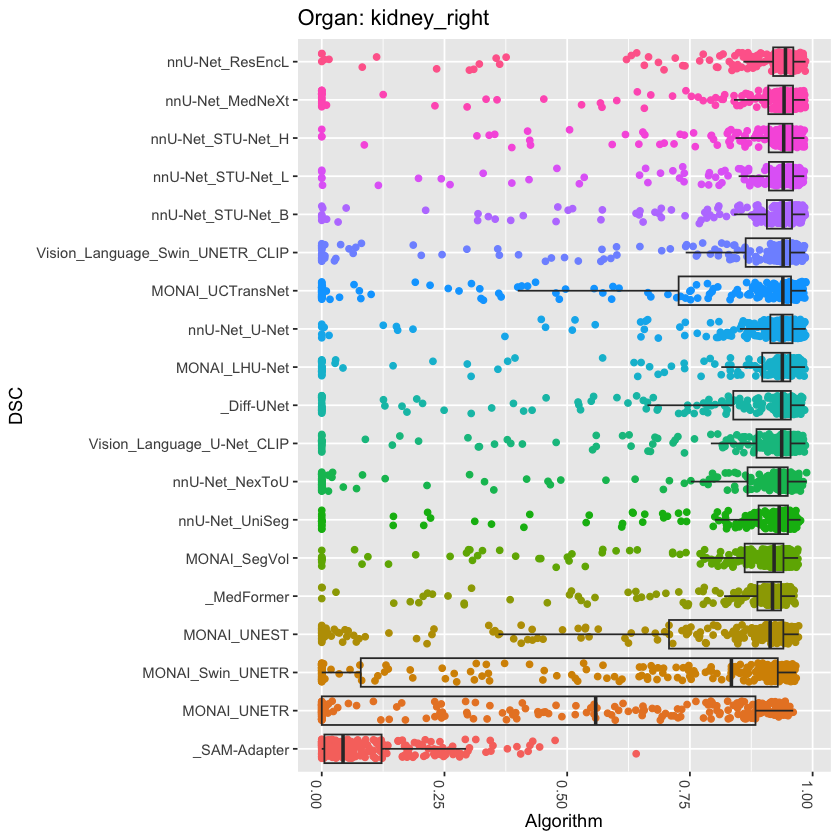

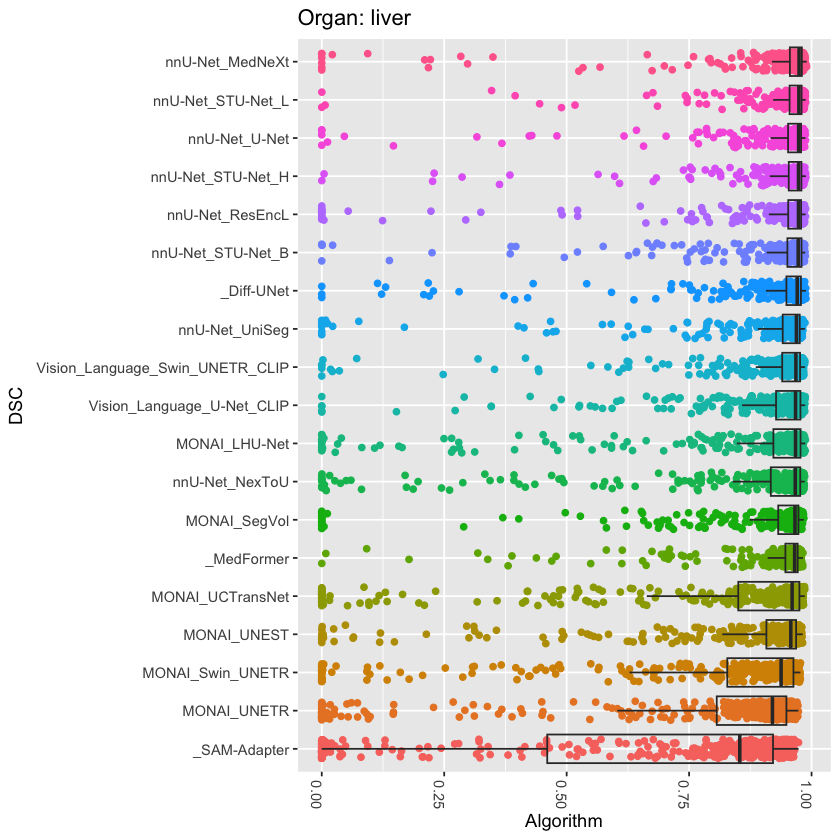

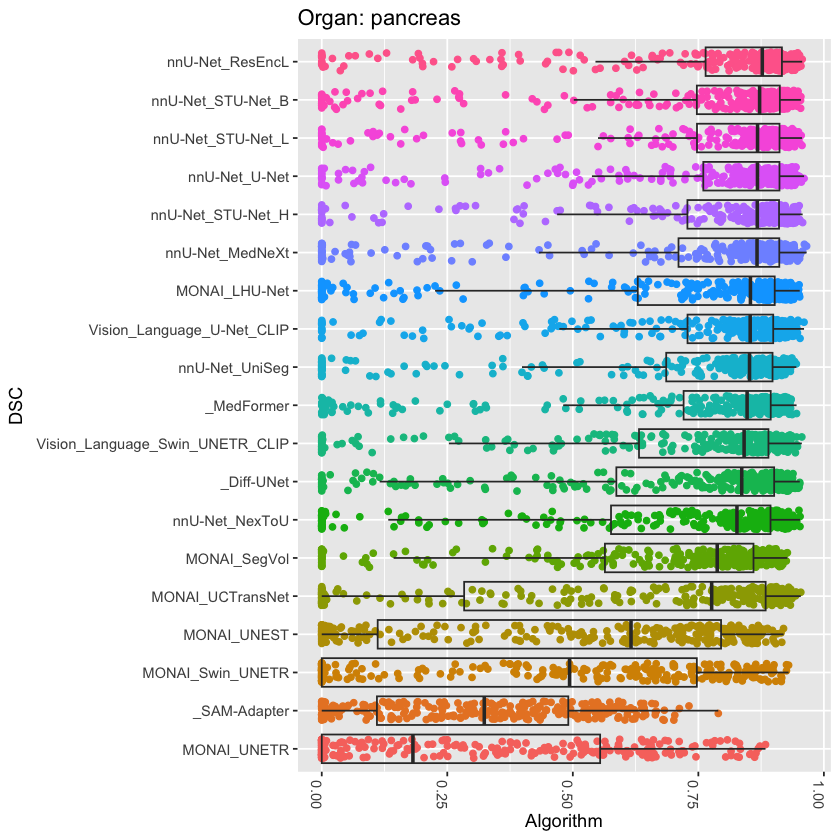

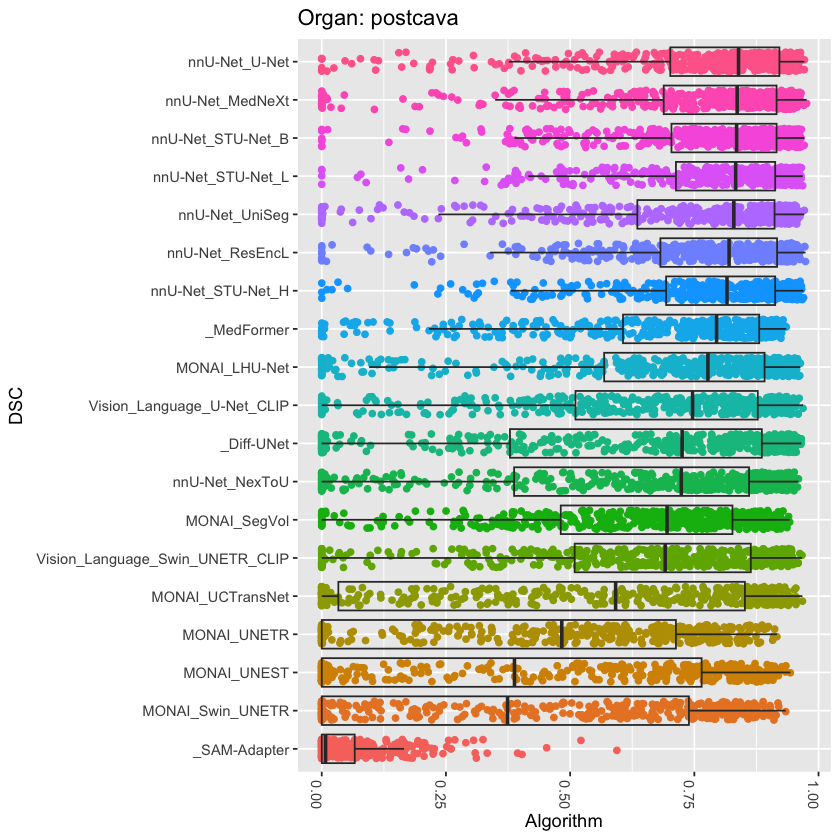

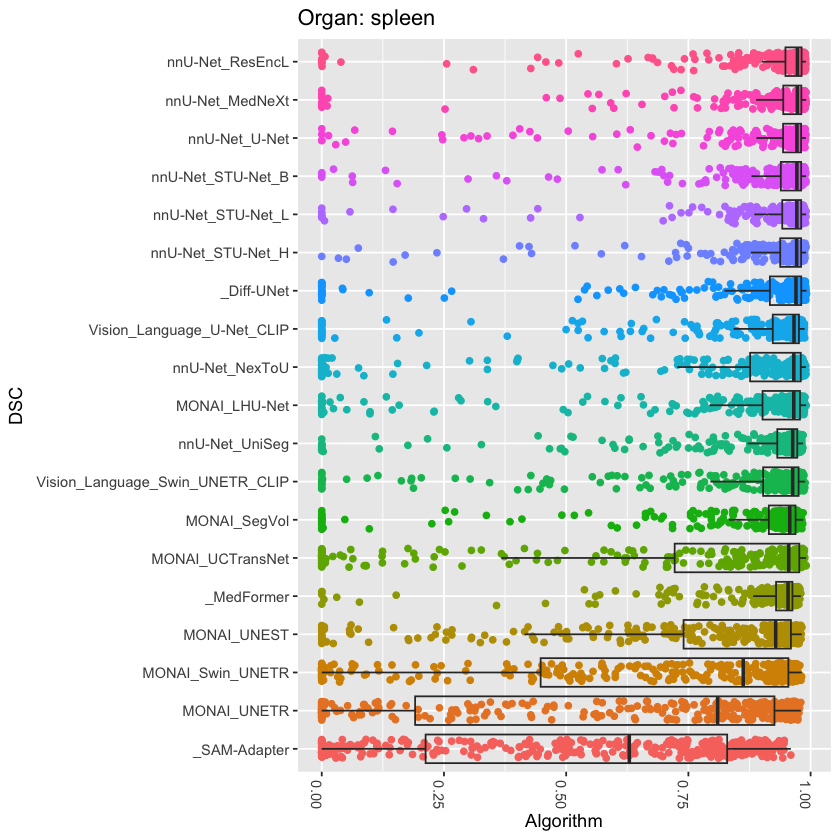

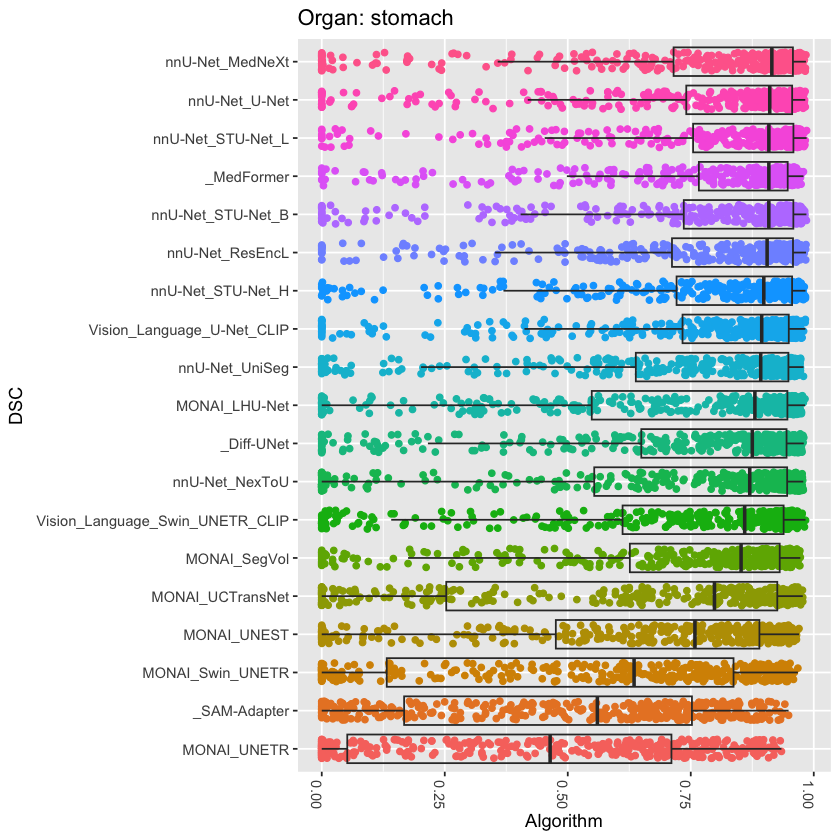

In [19]:
# ---------------------------------------------------
# 0) Packages
# ---------------------------------------------------
library(challengeR)
library(dplyr)
library(purrr)
library(readr)
library(ggplot2)

# ---------------------------------------------------
# 1) Set up
# ---------------------------------------------------
parent_dir <- "./totalsegmentator_results"
model_dirs <- list.dirs(parent_dir, recursive = FALSE)

# The organs you have columns for:
organs <- c("aorta", "gall_bladder", "kidney_left", "kidney_right",
            "liver", "pancreas", "postcava", "spleen", "stomach")

# We'll store the final boxplots in a list
boxplots <- list()

# ---------------------------------------------------
# 2) For each organ, gather data from all model dirs
# ---------------------------------------------------
for (org in organs) {

  message("Processing organ: ", org)

  # Read from all model dirs & keep only 'name' + that organ
  df_all <- map_dfr(model_dirs, function(mdir) {
    csv_file <- file.path(mdir, "dsc.csv")
    if (!file.exists(csv_file)) {
      message("Skipping: no dsc.csv in ", mdir)
      return(NULL)
    }
    tmp <- read_csv(csv_file, show_col_types = FALSE)

    # Each CSV has 'name', plus columns for the 9 organs
    # We'll keep 'name' and the current 'org' column
    # But check that 'org' column exists
    if (!org %in% names(tmp)) {
      message("Skipping: column ", org, " not found in ", csv_file)
      return(NULL)
    }

    tmp <- tmp %>%
      select(name, all_of(org))

    # Rename columns to fit as.challenge()
    # 'case' => name
    # 'value' => the organ column
    tmp <- tmp %>%
      rename(case = name, value = !!org) %>%
      mutate(algo = basename(mdir))   # model name from subdir
  })

  # If no data was read, skip
  if (nrow(df_all) == 0) {
    message("No data for organ ", org, " - skipping.")
    next
  }

  # ---------------------------------------------------
  # 3) Construct challenge & compute ranking
  # ---------------------------------------------------
  # Single-task challenge for this organ
  chal <- as.challenge(
    df_all,
    algorithm = "algo",
    case      = "case",
    value     = "value",
    taskName  = org,        # label the task as the organ
    smallBetter = TRUE,     # Reverse ordering here
    na.treat    = "na.rm"    # remove rows with NA
  )

  ranking <- chal %>%
    aggregateThenRank(FUN = median, ties.method = "min")

  # ---------------------------------------------------
  # 4) Create boxplot for this organ, with algo on Y
  # ---------------------------------------------------
  # By default, challengeR::boxplot() puts algo on X-axis,
  # so we can just add + coord_flip() to swap.
  p <- boxplot(ranking) +
       coord_flip() +
       ggtitle(paste("Organ:", org)) +
       xlab("DSC") +
       ylab("Algorithm")

  # Store in a list
  boxplots[[org]] <- p
}

# ---------------------------------------------------
# 5) Inspect or save the resulting list of plots
# ---------------------------------------------------
# For example, print them in console:
# boxplots[["liver"]]
# boxplots[["kidney_left"]]
# etc.

# Optionally, you could loop & save each to PDF
# for (org in names(boxplots)) {
#   ggsave(filename=paste0(org,"_boxplot.pdf"), boxplots[[org]],
#          width=6, height=4)
# }


library(patchwork)   # if not installed: install.packages("patchwork")

combined_plot <- wrap_plots(boxplots, ncol = 3)
print(combined_plot)


for (p in boxplots) {
  print(p)
  Sys.sleep(1)  # optional: pause between plots
}


In [ ]:
# ?aggregateThenRank

In [ ]:
##############################################
## 0) Required packages
##############################################
library(dplyr)
library(tidyr)
library(challengeR)
library(ggplot2)   # for any final patchwork usage or theme
# Optionally: library(patchwork) or cowplot, if you want to combine subplots

##############################################
## 1) List all subfolders that contain DSC files
##############################################
# Suppose your structure is "totalsegmentator_results/NAME_OF_MODEL/dsc.csv".
# We'll get a list of subdirectories that contain "dsc.csv".
base_dir <- "totalsegmentator_results"

# A simple approach: get all subfolders, keep those with "dsc.csv"
all_subdirs <- list.dirs(base_dir, full.names = TRUE, recursive = FALSE)

# For each subdir, check if "dsc.csv" exists
model_info <- data.frame()
for (subdir in all_subdirs) {
  dsc_path <- file.path(subdir, "dsc.csv")
  if (file.exists(dsc_path)) {
    model_name <- basename(subdir)  # e.g. "nnU-Net_U-Net", "MONAI_LHU-Net", etc.
    model_info <- rbind(model_info,
                        data.frame(model_name = model_name,
                                   file_path  = dsc_path,
                                   stringsAsFactors = FALSE))
  }
}
# 'model_info' now has columns: model_name, file_path

##############################################
## 2) Read each model's DSC.csv, pivot longer
##############################################
all_data_long <- data.frame()

for (i in seq_len(nrow(model_info))) {
  this_model <- model_info$model_name[i]
  this_file  <- model_info$file_path[i]

  # read CSV => each row is one 'name' (case), columns are organs
  df_wide <- read.csv(this_file, stringsAsFactors = FALSE)

  # pivot longer => columns: name, organ, dsc
  df_long <- df_wide %>%
    pivot_longer(
      cols = -name,    # pivot all columns except "name"
      names_to = "organ",
      values_to = "dsc"
    )
  # Label the algorithm
  df_long$Algorithm <- this_model

  # combine
  all_data_long <- bind_rows(all_data_long, df_long)
}

##############################################
## 3) Build a challenge object
##############################################
my_challenge <- as.challenge(
  object      = all_data_long,
  case        = "name",       # the column identifying each scan
  algorithm   = "Algorithm",  # the column labeling each model
  value       = "dsc",        # the DSC column
  by          = "organ",      # treat each 'organ' as a separate "task"
  smallBetter = FALSE,        # larger DSC is better
  na.treat    = "na.rm",      # drop NA entries
  check       = TRUE
)

##############################################
## 4) Convert to a ranked format
##############################################
# For boxplots in challengeR we can do either:
#  -- boxplot() on a "ranked.list" object
#  -- or boxplot() on the raw "challenge" object (which internally calls rank).
#
# Typically you'd do rank(...) first so challengeR knows the order of algorithms.
# ties.method="min" is typical, but you can pick "average", etc.
##############################################
my_ranked <- rank(my_challenge, ties.method = "min")

##############################################
## 5) Produce the boxplots
##############################################
# The function boxplot.ranked.list(...) returns a list of ggplots, one per organ
# with both dot/jitter and box‐and‐whiskers. By default they share a single color legend.
# You can do something like:
##############################################
plot_list <- boxplot(my_ranked,
                     jitter.width = 0.3)  # can tweak

# This returns a list of ggplot objects, one for each organ.
# If you just have 1 or 2 organs, printing them individually is easy:
# e.g. print(plot_list[["liver"]]) or something.

# If you have many organs, you can arrange them in a grid with patchwork or cowplot:
# For example, if you want them all in one PDF:
pdf("JHH_Boxplots_AllOrgans.pdf", width=10, height=8)
for (plt in plot_list) {
  print(plt)
  # or you can do e.g. patchwork::wrap_plots(plot_list) if you prefer a single page
}
dev.off()

##############################################
## 6) That’s it!
##############################################
# Now you have a set of boxplots (one per organ).
# Each boxplot shows a dot swarm + box, colored by 'Algorithm'.
# This is similar to the "Figure 15" style from the paper (distribution of DSC across each organ).
